In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
acoustic=pd.read_csv('/content/drive/MyDrive/Technocolab/one.csv')
# acoustic.head()

In [55]:
user_behaviour=pd.read_csv('/content/drive/MyDrive/Technocolab/two.csv')
# user_behaviour.head()

In [56]:
user_behaviour = user_behaviour.rename(columns={'track_id_clean': 'track_id'})
# user_behaviour.head()

In [57]:
df = pd.merge(acoustic, user_behaviour, on='track_id')
df.shape

(167880, 50)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   track_id                         167880 non-null  object 
 1   duration                         167880 non-null  float64
 2   release_year                     167880 non-null  int64  
 3   us_popularity_estimate           167880 non-null  float64
 4   acousticness                     167880 non-null  float64
 5   beat_strength                    167880 non-null  float64
 6   bounciness                       167880 non-null  float64
 7   danceability                     167880 non-null  float64
 8   dyn_range_mean                   167880 non-null  float64
 9   energy                           167880 non-null  float64
 10  flatness                         167880 non-null  float64
 11  instrumentalness                 167880 non-null  float64
 12  ke

In [59]:
df.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,mode,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,t_a540e552-16d4-42f8-a185-232bd650ea7d,109.706673,1950,99.975414,0.458040,0.519497,0.504949,0.399767,7.511880,0.817709,0.903753,3.254327e-06,0,0.132124,-11.238,0.386100,major,0.541606,0.079985,166.287003,4,0.935512,-0.033284,-0.411896,-0.028580,0.349438,0.832467,-0.213871,-0.299464,-0.675907,0_0e4a49d8-688d-4958-94db-5cb56adc3090,10,10,False,False,False,False,0,1,0,0,0,0,True,10,2018-07-15,True,user_collection,trackdone,trackdone
1,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,0_0cc4863b-83ff-48cb-afda-f952ad323562,8,11,False,False,False,True,0,1,0,0,0,0,False,23,2018-07-14,True,radio,trackdone,trackdone
2,t_67965da0-132b-4b1e-8a69-0ef99b32287c,187.693329,1950,99.969430,0.916272,0.419223,0.545530,0.491235,9.098376,0.154258,1.037952,8.344854e-12,0,0.163281,-13.706,0.125000,major,0.895874,0.083877,95.261002,3,0.359675,0.145703,-0.850372,0.123860,0.746904,0.371803,-0.420558,-0.213120,-0.525795,0_0cc4863b-83ff-48cb-afda-f952ad323562,10,11,True,True,True,False,0,1,0,0,0,0,False,23,2018-07-14,True,radio,backbtn,fwdbtn
3,t_0614ecd3-a7d5-40a1-816e-156d5872a467,160.839996,1951,99.602549,0.812884,0.425890,0.508280,0.491625,8.368670,0.358813,1.004268,2.927475e-10,0,0.090115,-10.522,0.200669,minor,0.806136,0.038777,105.185997,4,0.726769,0.021720,-0.743634,0.333247,0.568447,0.411094,-0.187749,-0.387599,-0.433496,0_061d77c2-5526-43b2-993c-adf4338897ce,6,10,False,False,False,True,0,0,1,1,0,0,False,22,2018-07-14,True,user_collection,trackdone,trackdone
4,t_070a63a0-744a-434e-9913-a97b02926a29,175.399994,1951,99.665018,0.396854,0.400934,0.359990,0.552227,5.967346,0.514585,0.975138,3.981341e-11,0,0.360924,-11.032,0.427152,major,0.492772,0.038337,119.441002,4,0.859075,0.039143,-0.267555,-0.051825,0.106173,0.614825,-0.111419,-0.265953,-0.542753,0_091c94f6-e76b-4b3e-8366-5d9d3c3e2fef,2,20,False,False,True,False,0,0,1,1,0,0,False,20,2018-07-14,True,catalog,trackdone,endplay


In [60]:
df.describe()

,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
count,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,1.678800e+05,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000,167880.000000
mean,215.893484,2013.368614,99.744583,0.217969,0.547847,0.580170,0.668978,9.098028,0.626536,1.008124,3.174287e-02,5.202692,0.189810,-7.049820,0.596501,0.348247,0.142189,122.674906,3.948916,0.459283,-0.516251,0.268847,0.206278,-0.016393,-0.139975,0.047940,-0.283057,0.059859,9.325911,17.651823,0.040904,0.767602,0.146635,0.172832,0.038909,0.046259,14.193084
std,60.223626,9.740043,0.892779,0.246097,0.158555,0.179003,0.159486,2.540397,0.181731,0.038892,1.427120e-01,3.681829,0.150867,3.164024,0.207718,0.188667,0.133225,29.821581,0.336965,0.229190,0.385527,0.193834,0.165442,0.266361,0.313722,0.116279,0.301132,0.261958,5.457638,3.422025,0.198069,0.422363,0.353742,0.378103,0.367295,0.606558,5.996243
min,30.013330,1950.000000,90.018900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.122792,-1.084360,-0.752231,-0.809136,-1.029858,-0.942461,-0.736395,-0.975647,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.503403,2015.000000,99.913831,0.030579,0.434064,0.451872,0.562350,7.224558,0.513711,0.989104,3.701751e-09,1.000000,0.099943,-8.232000,0.452991,0.205129,0.044635,97.004997,4.000000,0.280089,-0.841586,0.225853,0.174902,-0.170540,-0.330586,-0.030063,-0.489797,-0.020752,5.000000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,11.000000
50%,212.027023,2017.000000,99.988785,0.115362,0.550788,0.594088,0.687427,8.965730,0.630788,1.013991,5.221813e-07,5.000000,0.125049,-6.506000,0.639286,0.305746,0.086432,123.935997,4.000000,0.442400,-0.658701,0.311700,0.235429,0.044054,-0.273355,0.037739,-0.376095,0.143839,9.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,15.000000
75%,240.800003,2018.000000,99.998715,0.336899,0.665993,0.724430,0.786602,10.764786,0.760826,1.033737,9.802441e-05,8.000000,0.235885,-5.083000,0.757812,0.470098,0.206128,144.072998,4.000000,0.626337,-0.203098,0.374788,0.298177,0.134389,-0.019001,0.139464,-0.180665,0.194377,14.000000,20.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.000000
max,1787.760986,2018.000000,99.999997,0.995796,0.990419,0.972590,0.984952,32.342781,0.999877,1.103213,9.993988e-01,11.000000,0.996257,1.634000,1.000000,0.962350,0.961408,218.774994,5.000000,0.999990,0.932165,0.812837,0.605288,1.074504,0.895769,0.380279,0.966760,1.152213,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,60.000000,151.000000,23.000000


In [61]:
df.release_year.value_counts() 

2018    66521
2017    33414
2016    15712
2015    10341
2014     5685
        ...  
1957       16
1950       13
1955       11
1953        9
1952        4
Name: release_year, Length: 69, dtype: int64

In [62]:
# Checking the missing values
df.isnull().sum()

track_id                           0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
danceability                       0
dyn_range_mean                     0
energy                             0
flatness                           0
instrumentalness                   0
key                                0
liveness                           0
loudness                           0
mechanism                          0
mode                               0
organism                           0
speechiness                        0
tempo                              0
time_signature                     0
valence                            0
acoustic_vector_0                  0
acoustic_vector_1                  0
acoustic_vector_2                  0
acoustic_vector_3                  0
acoustic_vector_4                  0
a

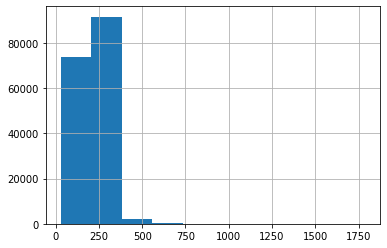

In [63]:
df.duration.hist();

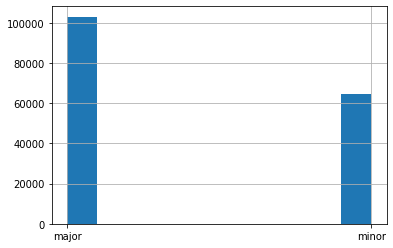

In [64]:
df['mode'].hist();

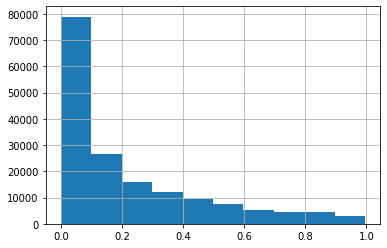

In [65]:
df.acousticness.hist();

In [66]:
new_df = df[['danceability', 'energy', 'acousticness','flatness','us_popularity_estimate']].copy()

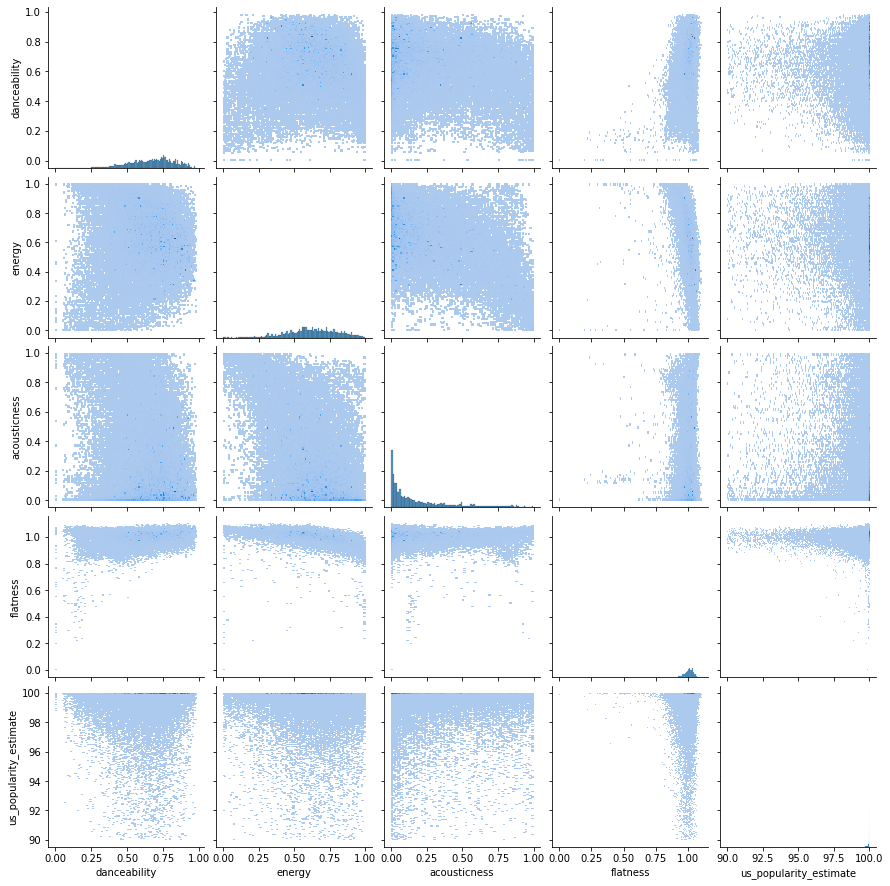

In [67]:
sns.pairplot(new_df,kind="hist")

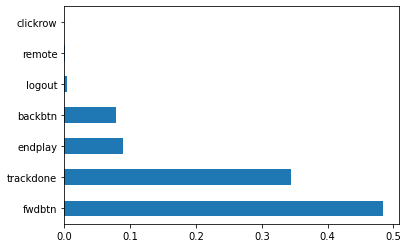

In [68]:
df.hist_user_behavior_reason_end.value_counts(normalize=True)

#plot the bar graph of percentage job categories
df.hist_user_behavior_reason_end.value_counts(normalize=True).plot.barh()
plt.show()

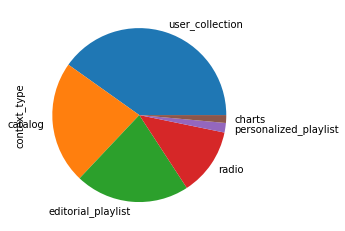

In [69]:
df.context_type.value_counts(normalize=True)

#plot the bar graph of percentage job categories
df.context_type.value_counts(normalize=True).plot.pie()
plt.show()

In [70]:
df.duration.describe()

count    167880.000000
mean        215.893484
std          60.223626
min          30.013330
25%         183.503403
50%         212.027023
75%         240.800003
max        1787.760986
Name: duration, dtype: float64

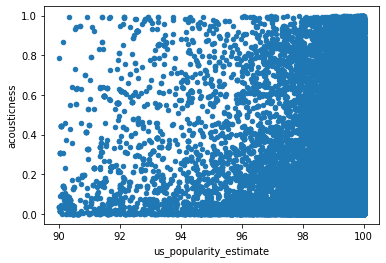

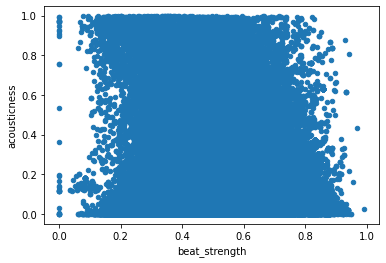

In [71]:
df.plot.scatter(x="us_popularity_estimate",y="acousticness")
plt.show()
df.plot.scatter(x="beat_strength",y="acousticness")
plt.show()


In [72]:
df.duration.count()

167880

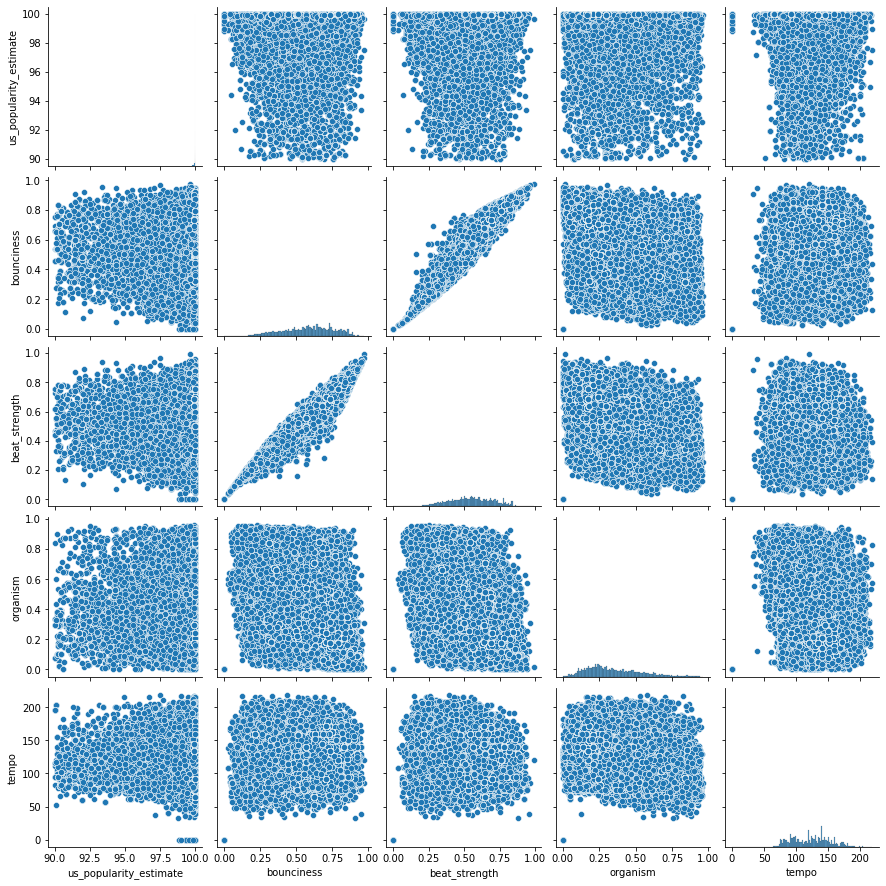

In [73]:
sns.pairplot(data = df, vars=['us_popularity_estimate','bounciness','beat_strength','organism','tempo'])
plt.show()

In [74]:
df['skip_rate'] = np.where(df.skip_2=='True',1,0)
df.skip_rate.value_counts()

0    167880
Name: skip_rate, dtype: int64

In [75]:
df['skip_2'].value_counts()

True     86824
False    81056
Name: skip_2, dtype: int64

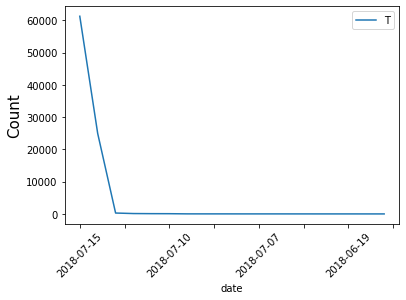

In [82]:
counts = df["date"].groupby(df["skip_2"]).value_counts()
date = list(set(df["date"].tolist()))
plt.figure()
counts[1].plot(rot=45)
plt.ylabel('Count', fontsize=15)
plt.legend("True")

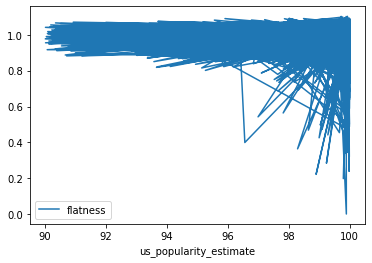

In [78]:
ax = plt.gca()
df.plot(kind='line',x='us_popularity_estimate',y='flatness',ax=ax)
# df.plot(kind='line',x='mode',y='num_pets', color='red', ax=ax)